In [281]:
#supress warnings

import warnings
warnings.filterwarnings('ignore')

# <span style="color: red;"> PART I: EDA - Explonatory Data Analysis </span>

# 1. Importing Libraries

In [282]:
# importing important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Reading Data

In [283]:
# reading data and printing first 5 rows

df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## 2.1 Data Dictionary
    - instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

# 3. Cleaning Data

####  Counting Rows & Columns

In [284]:
rows=len(df)
columns=len(df.columns)
print("No. of rows:",rows) # no. of rows  
print("No. of columns:",columns) # no. of columns 
print("No. of values:",df.size) # no. of cells in dataframe

No. of rows: 730
No. of columns: 16
No. of values: 11680


####   Count of Missing Values in each Column

In [285]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

<div class="alert alert-block alert-info">
<b>Note:</b> <b>No missing values</b>
</div>

## 3.1 Data Info

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


<div class="alert alert-block alert-info">
<b>Note:</b> <b>No junk value as there's uniformity and datatype match the column objective.</b> There are 730 rows and 16 columns out of which 4 are floating type, 11 are integer type and only 1 is object type.
</div>

## 3.2 Data Description

In [287]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<div class="alert alert-block alert-info">
<b>Note:</b> <b>No outliers </b>(no wide range differences between min-25%-50%-75%-max values).
</div>

#### Checking duplicates

In [288]:
print("Data shape before:",df.shape)
df.drop_duplicates(inplace = True)
print("Data shape after:",df.shape)

Data shape before: (730, 16)
Data shape after: (730, 16)


<div class="alert alert-block alert-info">
<b>Note:</b> <b>No duplicates </b>
</div>

<div class="alert alert-block alert-danger">
<b>Note:</b> From the above inspection of dataset it can be noted that there are <b>no missing values</b>, <b>no outliers</b>, <b>no duplicate values</b> and <b>no junk values.</b> Hence data cleaning doesn't need much attention here. Some standardisation is needed which will be carried out as you proceed.
</div>

## 3.3 Standardising Column names & values

- Dropping 'instant' column (not useful)
- Renaming 'dteday' ---> 'Date', 'yr' ---> 'Year', 'weathersit' ---> 'weather', 'hum' ---> 'humidity', 'cnt' ---> 'total_count'
- Setting 'date' as index column.
- Changing 'season' values to respective season representative (from integer to string representative)
- Changing 'weathersit' values to respective weather representative (from integer to string representative)
- Roundingoff 'temp', 'atemp', 'hum', 'windspeed' values to 2 decimal places

In [289]:
df.drop(['instant'], axis = 1, inplace=True)
df.rename(columns = {'dteday':'date', 'yr':'year', 'weathersit':'weather', 'hum':'humidity', 'cnt':'total_count'}, inplace = True)
df.set_index("date", inplace = True)
df['season'].loc[(df['season'] == 1)] = 'spring'
df['season'].loc[(df['season'] == 2)] = 'summer'
df['season'].loc[(df['season'] == 3)] = 'fall'
df['season'].loc[(df['season'] == 4)] = 'winter'
df['weather'].loc[(df['weather'] == 1)] = 'Clear, Few clouds, Partly cloudy'
df['weather'].loc[(df['weather'] == 2)] = 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'
df['weather'].loc[(df['weather'] == 3)] = 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds'
df['weather'].loc[(df['weather'] == 4)] = 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
df=df.round(2)


df.head()

,season,year,mnth,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
date,,,,,,,,,,,,,,
01-01-2018,spring,0,1,0,6,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.11,18.18,80.58,10.75,331,654,985
02-01-2018,spring,0,1,0,0,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.90,17.69,69.61,16.65,131,670,801
03-01-2018,spring,0,1,0,1,1,"Clear, Few clouds, Partly cloudy",8.05,9.47,43.73,16.64,120,1229,1349
04-01-2018,spring,0,1,0,2,1,"Clear, Few clouds, Partly cloudy",8.20,10.61,59.04,10.74,108,1454,1562
05-01-2018,spring,0,1,0,3,1,"Clear, Few clouds, Partly cloudy",9.31,11.46,43.70,12.52,82,1518,1600


In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 01-01-2018 to 31-12-2019
Data columns (total 14 columns):
season         730 non-null object
year           730 non-null int64
mnth           730 non-null int64
holiday        730 non-null int64
weekday        730 non-null int64
workingday     730 non-null int64
weather        730 non-null object
temp           730 non-null float64
atemp          730 non-null float64
humidity       730 non-null float64
windspeed      730 non-null float64
casual         730 non-null int64
registered     730 non-null int64
total_count    730 non-null int64
dtypes: float64(4), int64(8), object(2)
memory usage: 85.5+ KB


<div class="alert alert-block alert-info">
<b>Note:</b> <b>After the change:</b> Earlier there were 16 columns but now 14 as we dropped 'instant' column and made 'date' column as new index column. Also there were 11 integer type columns which included 'instant', 'season', 'weather' but there are 8 of them left. Instead of 1 object type column now there are 2 as 'season' & 'weather' make their entry into this type.
</div>

In [291]:
columns=list(df.columns) # list of columns
data_type=[]             # data type to be inserted
for cols in columns:
        count=len(dict(df[cols].value_counts()))
        if count > 20:
            data_type.append("Continuous")
        else:
            data_type.append("Category")
    
column_type = dict(zip(columns, data_type)) # dictionary of COLUMNS <-> DATA_TYPE
column_type = pd.DataFrame(list(column_type.items()),columns = ['COLUMN','TYPE']) # converting dictionary to dataframe

column_type

,COLUMN,TYPE
0,season,Category
1,year,Category
2,mnth,Category
3,holiday,Category
4,weekday,Category
5,workingday,Category
6,weather,Category
7,temp,Continuous
8,atemp,Continuous
9,humidity,Continuous


# 4. Univariate Analysis

## 4.1 Categorical Data

#### Analysis for 'season' column

In [292]:
df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [293]:
df.season.value_counts(normalize=True)

fall      0.257534
summer    0.252055
spring    0.246575
winter    0.243836
Name: season, dtype: float64

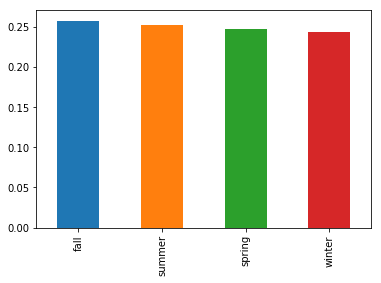

In [294]:
df.season.value_counts(normalize=True).plot.bar()
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> All the 4 seasons have almost equal share.
</div>

#### Analysis for 'year' column (2018/2019) ---> (0/1)

In [295]:
df.year.value_counts()

1    365
0    365
Name: year, dtype: int64

In [296]:
df.year.value_counts(normalize=True)

1    0.5
0    0.5
Name: year, dtype: float64

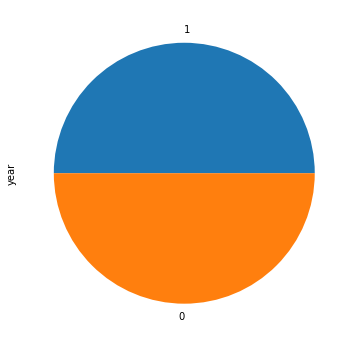

In [297]:
plt.figure(figsize=[6,6])
df.year.value_counts(normalize=True).plot.pie()
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> 
<ul>
     <li>1 ---> 2019</li>
     <li>0 ---> 2018</li>
</ul><br>
Equal no. of days (365) has been observed in both 2018 and 2019.
</div>

#### Analysis for 'holiday' column (0/1) ---> (no holiday / holiday)

In [298]:
df.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [299]:
df.holiday.value_counts(normalize=True)

0    0.971233
1    0.028767
Name: holiday, dtype: float64

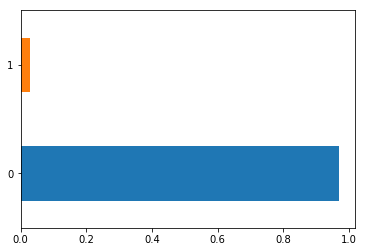

In [300]:
df.holiday.value_counts(normalize=True).plot.barh()
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> 
<ul>
     <li>1 ---> holiday</li>
     <li>0 ---> no holiday</li>
</ul><br>
Only 3% of the days were a "Holiday" rest 97% weren't.
    
</div>

#### Analysis for 'workingday' column (0/1) ---> (no working day / working day)

In [301]:
df.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [302]:
df.workingday.value_counts(normalize=True)

1    0.683562
0    0.316438
Name: workingday, dtype: float64

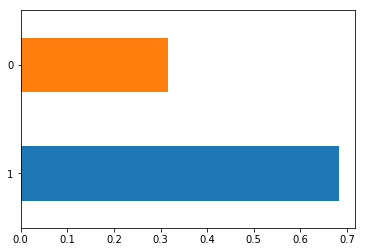

In [303]:
df.workingday.value_counts(normalize=True).plot.barh()
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> 
<ul>
     <li>1 ---> working day</li>
     <li>0 ---> no working day</li>
</ul><br>
68% of the days were "working days" rest 32% weren't.
    
</div>

#### Analysis for 'weather' column 

In [304]:
df.weather.value_counts()

Clear, Few clouds, Partly cloudy                                                           463
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               246
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds     21
Name: weather, dtype: int64

In [305]:
df.weather.value_counts(normalize=True)

Clear, Few clouds, Partly cloudy                                                           0.634247
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               0.336986
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    0.028767
Name: weather, dtype: float64

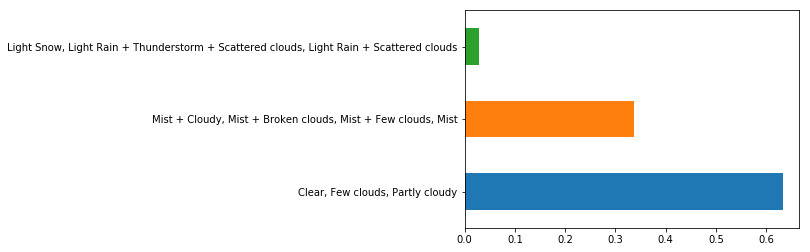

In [306]:
df.weather.value_counts(normalize=True).plot.barh()
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> 
<ul>
     <li>63% of the days were clear or partly cloudy.</li>
     <li>34% of the days were misty and cloudy.</li>
     <li>3% of the days were snowy, cloudy, rainy with thunderstorm</li>
</ul><br>
 
</div>

## 4.2 Continuous Data

#### Analysis for 'temp', 'humidity' & 'windspeed' columns

![](skew.png)

In [307]:
df[["temp", 'humidity', 'windspeed']].describe()

,temp,humidity,windspeed
count,730.000000,730.000000,730.000000
mean,20.319329,62.765082,12.763699
std,7.506827,14.237634,5.195640
min,2.420000,0.000000,1.500000
25%,13.810000,52.000000,9.040000
50%,20.465000,62.625000,12.130000
75%,26.882500,72.990000,15.627500
max,35.330000,97.250000,34.000000


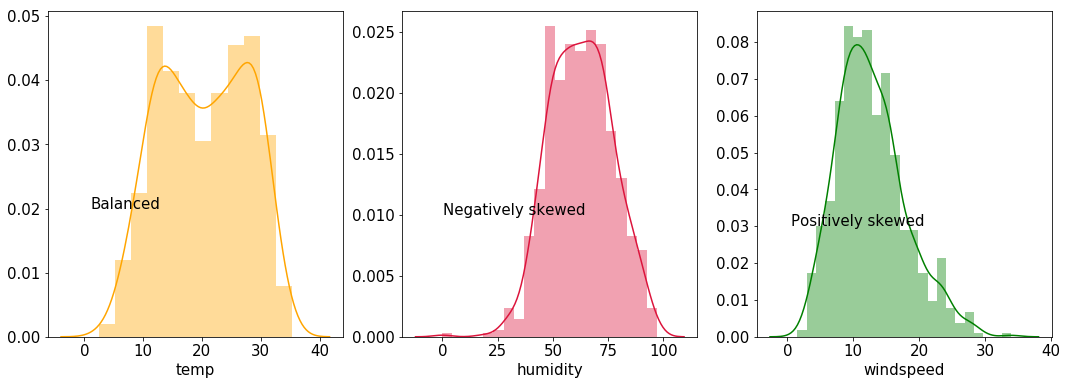

In [308]:
plt.rcParams['font.size'] = 15
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
sns.distplot(df['temp'], ax=ax[0], color='orange')
ax[0].text(1.0,0.02,"Balanced")
sns.distplot(df['humidity'], ax=ax[1], color='crimson')
ax[1].text(0.3,0.01,"Negatively skewed")
sns.distplot(df['windspeed'], ax=ax[2], color='green')
ax[2].text(0.5,0.03,"Positively skewed")
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The distplot here shows distribution and skewness.
<ul>
     <li>Distribution of 'temp' rises from 0 then takes a little dip, rises again and then falls towards 40. It shows symmetrical graph and a balanced skewness. </li>
     <li>'humidity' is negatively skewed which means the mass of the distribution is concentrated on the right side of the figure and the tail is on the left side of the distribution. It rises from 0 and goes up and then falls towards 100.</li>
     <li>'windspeed' is positively skewed which means the mass of the distribution is concentrated on the left side of the figure and the tail is on the right side of the distribution. It rises from 0 and goes up and then falls towards 40.</li>
</ul><br>
 
</div>

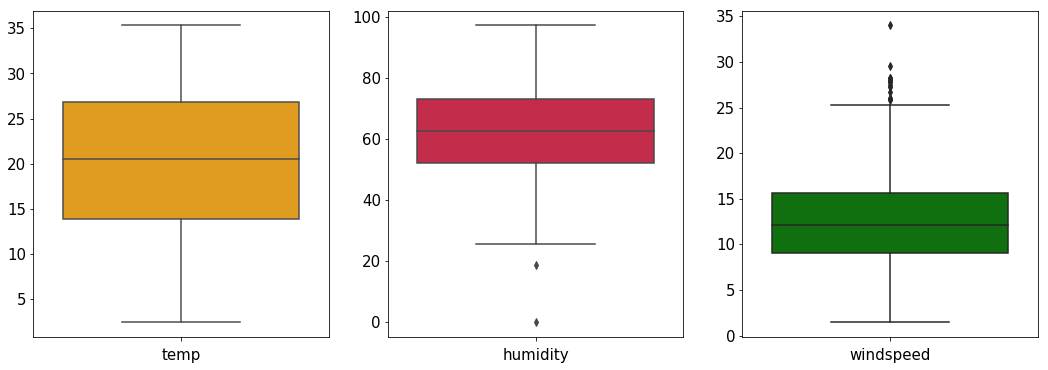

In [309]:
plt.rcParams['font.size'] = 15
fig, ax = plt.subplots(1, 3, figsize=(18,6))
sns.boxplot(df['temp'], ax=ax[0], color='orange', orient='v' )
ax[0].set(xlabel='temp', ylabel='')
sns.boxplot(df['humidity'], ax=ax[1], color='crimson', orient='v')
ax[1].set(xlabel='humidity', ylabel='')
sns.boxplot(df['windspeed'], ax=ax[2], color='green', orient='v')
ax[2].set(xlabel='windspeed', ylabel='')
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> 
<ul>
     <li>'temp' has no outliers. min below 5, max around 35, mean about 20, 25th %tile below 15 and 75th %tile above 25.</li>
     <li>'humidity' has few outliers below min range. min above 20, max around 100, mean above 60, 25th %tile b/w 40-60 and 75th %tile between 60-80.</li>
     <li>'windspeed' has few outliers above max range. min above 0, max around 25, mean b/w 10-15, 25th %tile below 10 and 75th %tile above 15.</li>
</ul><br>
 
</div>

#### Analysis for 'casual', 'registered' & 'total_count' columns

In [310]:
df[['casual', 'registered', 'total_count']].describe()

,casual,registered,total_count
count,730.000000,730.000000,730.000000
mean,849.249315,3658.757534,4508.006849
std,686.479875,1559.758728,1936.011647
min,2.000000,20.000000,22.000000
25%,316.250000,2502.250000,3169.750000
50%,717.000000,3664.500000,4548.500000
75%,1096.500000,4783.250000,5966.000000
max,3410.000000,6946.000000,8714.000000


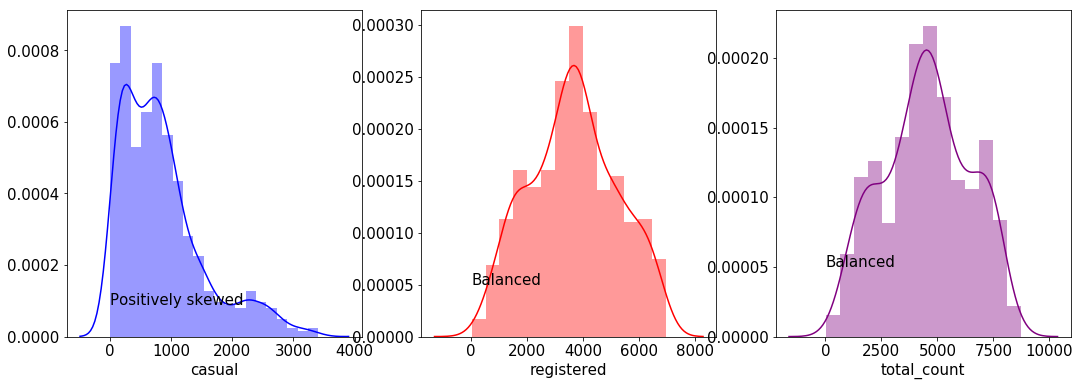

In [311]:
plt.rcParams['font.size'] = 15
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
sns.distplot(df['casual'], ax=ax[0], color='blue')
ax[0].text(1.0,0.00009,"Positively skewed")
sns.distplot(df['registered'], ax=ax[1], color='red')
ax[1].text(0.5,0.00005,"Balanced")
sns.distplot(df['total_count'], ax=ax[2], color='purple')
ax[2].text(0.7,0.00005,"Balanced")
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> 
<ul>
     <li>'casual' is positively skewed which means the mass of the distribution is concentrated on the left side of the figure and the tail is on the right side of the distribution. It rises from 0 and goes up and then falls towards 4000. </li>
     <li>'registered' is balanced. It rises from 0 and goes up and then falls towards 8000.</li>
     <li>'total_count' is also balanced. It rises from 0 and goes up and then falls towards 10000.</li>
</ul><br>
 
</div>

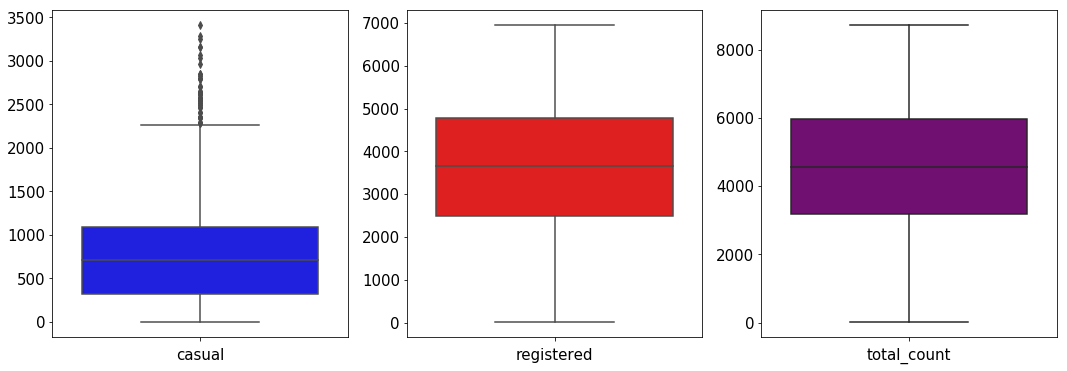

In [312]:
plt.rcParams['font.size'] = 15
fig, ax = plt.subplots(1, 3, figsize=(18,6))
sns.boxplot(df['casual'], ax=ax[0], color='blue', orient='v' )
ax[0].set(xlabel='casual', ylabel='')
sns.boxplot(df['registered'], ax=ax[1], color='red', orient='v')
ax[1].set(xlabel='registered', ylabel='')
sns.boxplot(df['total_count'], ax=ax[2], color='purple', orient='v')
ax[2].set(xlabel='total_count', ylabel='')
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> 
<ul>
     <li>'casual' has few outliers above max range. min above 0, max b/w 2000-2500, mean b/w 500-1000, 25th %tile b/w 0-500 and 75th %tile above 1000.</li>
     <li>'registered' has no outliers. min about 0, max about 7000, mean b/w 3000-4000, 25th %tile b/w 2000-3000 and 75th %tile b/w 4000-5000.</li>
     <li>'total_count' has no outliers. min about 0, max above 8000, mean b/w 4000-6000, 25th %tile b/w 2000-4000 and 75th %tile about 6000.</li>
     
</ul><br>
 
</div>

# 5. Bivariate Analysis

## 5.1 Numeric to Numeric Data

#### 'Casual' no. of riders against rising 'temp', 'humidity', 'windspeed'

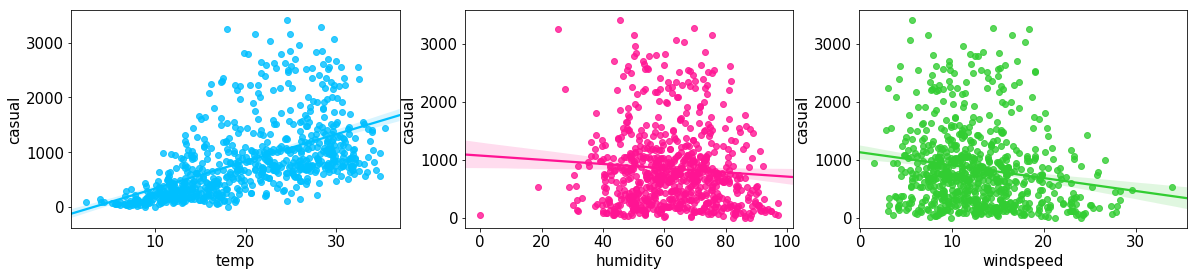

In [313]:
plt.rcParams['font.size'] = 15
fig, ax = plt.subplots(1, 3, figsize=(20, 4))
sns.regplot(x=df["temp"], y=df["casual"], ax=ax[0], color='deepskyblue')
sns.regplot(x=df["humidity"], y=df["casual"], ax=ax[1], color='deeppink')
sns.regplot(x=df["windspeed"], y=df["casual"], ax=ax[2], color='limegreen')
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> 
<ul>
     <li>'casual' no. of riders increase gradually with rising 'temp'. </li>
     <li>'casual' no. of riders decrease gradually with rising 'humidity'.</li>
     <li>'casual' no. of riders decrease gradually with rising 'windspeed'.</li>
     
</ul><br>
 
</div>

#### 'registered' no. of riders against rising 'temp', 'humidity', 'windspeed'

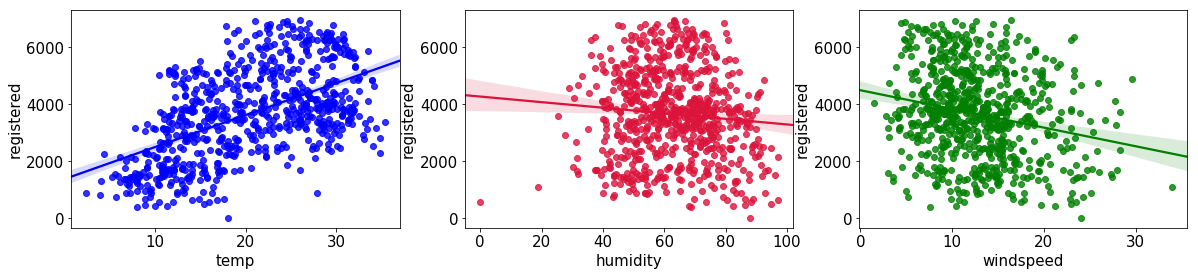

In [314]:
plt.rcParams['font.size'] = 15
fig, ax = plt.subplots(1, 3, figsize=(20, 4))
sns.regplot(x=df["temp"], y=df["registered"], ax=ax[0], color='blue')
sns.regplot(x=df["humidity"], y=df["registered"], ax=ax[1], color='crimson')
sns.regplot(x=df["windspeed"], y=df["registered"], ax=ax[2], color='green')
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> 
<ul>
     <li>'registered' no. of riders increase moderately with rising 'temp'. </li>
     <li>'registered' no. of riders decrease gradually with rising 'humidity'.</li>
     <li>'registered' no. of riders decrease moderately with rising 'windspeed'.</li>
     
</ul><br>
 
</div>

#### 'total_count' of riders against rising 'temp', 'humidity', 'windspeed'

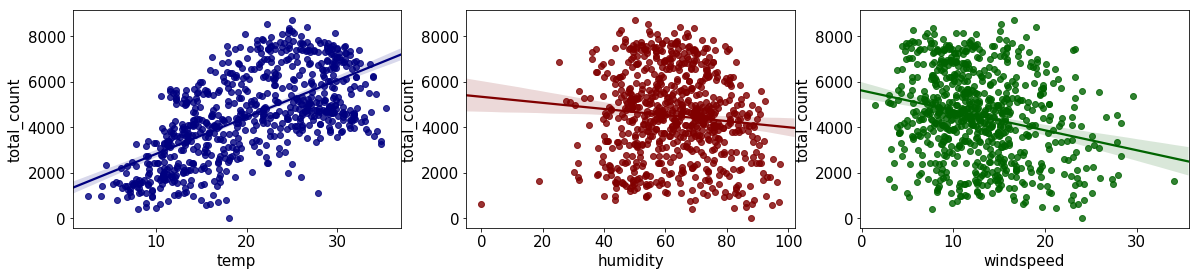

In [315]:
plt.rcParams['font.size'] = 15
fig, ax = plt.subplots(1, 3, figsize=(20, 4))
sns.regplot(x=df["temp"], y=df["total_count"], ax=ax[0], color='navy')
sns.regplot(x=df["humidity"], y=df["total_count"], ax=ax[1], color='maroon')
sns.regplot(x=df["windspeed"], y=df["total_count"], ax=ax[2], color='darkgreen')
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> 
<ul>
     <li>'total_count' of riders increase sharply with rising 'temp'. </li>
     <li>'total_count' of riders decrease gradually with rising 'humidity'.</li>
     <li>'total_count' of riders decrease moderately with rising 'windspeed'.</li>
     
</ul><br>
 
</div>

#### Relationship among 6 numeric variables

In [316]:
df[['temp','humidity','windspeed','casual', 'registered', 'total_count']].corr()

,temp,humidity,windspeed,casual,registered,total_count
temp,1.000000,0.128554,-0.158173,0.542723,0.539443,0.627046
humidity,0.128554,1.000000,-0.248535,-0.075205,-0.089208,-0.098538
windspeed,-0.158173,-0.248535,1.000000,-0.168011,-0.217932,-0.235152
casual,0.542723,-0.075205,-0.168011,1.000000,0.394137,0.672123
registered,0.539443,-0.089208,-0.217932,0.394137,1.000000,0.945411
total_count,0.627046,-0.098538,-0.235152,0.672123,0.945411,1.000000


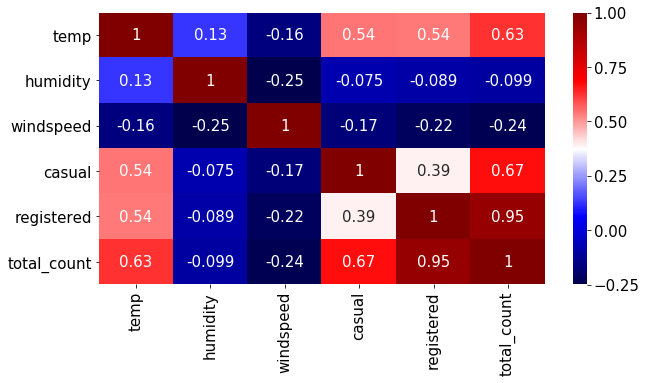

In [317]:
plt.figure(figsize=[10,5])
sns.heatmap(df[['temp','humidity','windspeed','casual', 'registered', 'total_count']].corr(), annot=True, cmap='seismic')

<div class="alert alert-block alert-info">
<b>Note:</b> Concentrate on red range of the heatmap. Because the blue part here is showing weak relationship.
<ul>
     <li>There's a strong relationship b/w 'registered' and 'total_count' of about 0.95 correlation coefficient.</li>
     <li>'casual' and 'total_count' share next highest coefficient with 0.67.</li>
     <li>'temp' with 'total_count' are at 0.63 whereas 'temp' with 'casual' & 'registered' are at 0.54</li>     
</ul><br>
 
</div>

## 5.2 Numeric to categorical Data

#### All categorical columns against 'total_count'

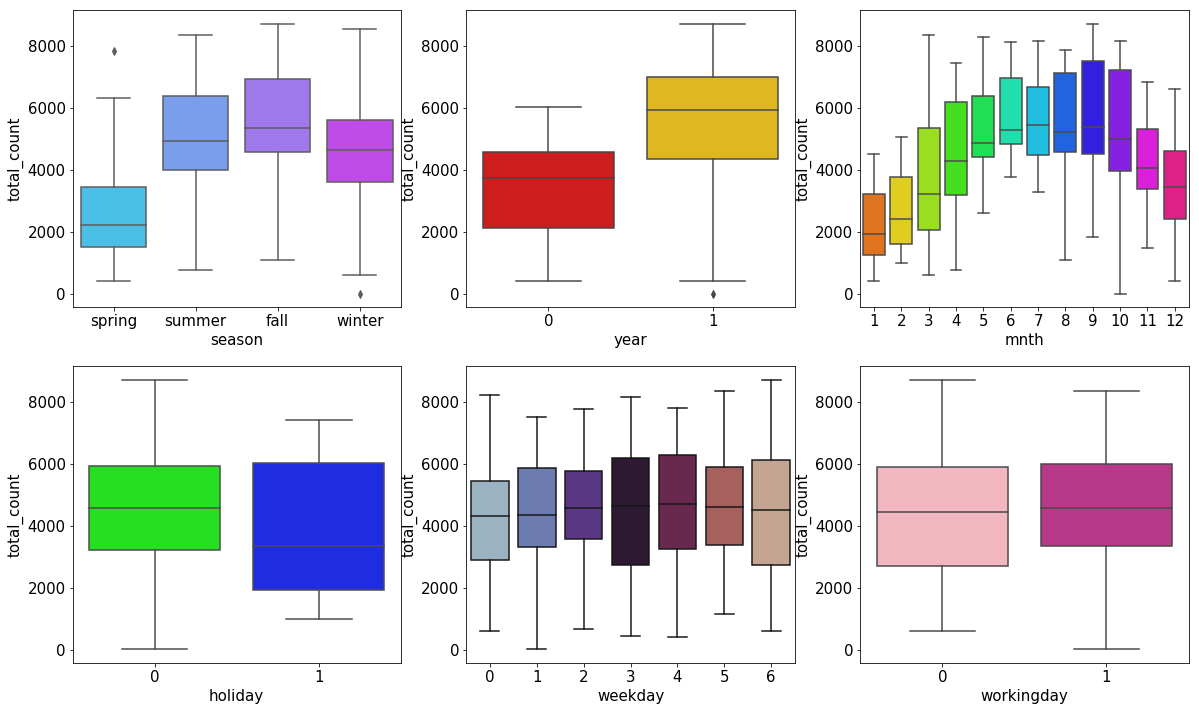

In [318]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'total_count', data = df, palette='cool')
plt.subplot(2,3,2)
sns.boxplot(x = 'year', y = 'total_count', data = df, palette='hot')
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'total_count', data = df, palette='hsv')
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'total_count', data = df, palette='hsv')
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'total_count', data = df, palette='twilight')
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'total_count', data = df, palette='RdPu')
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> 
<ul>
     <li>There were comparatively highest no. of riders obsered during summer and fall, followed by winter and spring.</li>
     <li>There was a great hike in the no. of riders in the year 2019 compared to 2018 | 0-->2018, 1-->2019</li>
     <li>During the months between May-October (5-10) there was rise in no. of riders, also the period of summer and fall.</li>
     <li>'No-holiday' observed biggest range in the no. of riders | 0-->No holiday, 1-->holiday</li>
     <li>Every day of the week showed almost same mean no. of riders.</li>
     <li>Both working and non-working days showed almost same mean no. of riders | 0-->non-workingday, 1-->workingday</li>
</ul><br>
 
</div>

#### Observing 'total_count' w.r.t 'temp','humidity','windspeed' under 'workingday' ---> yes/no category

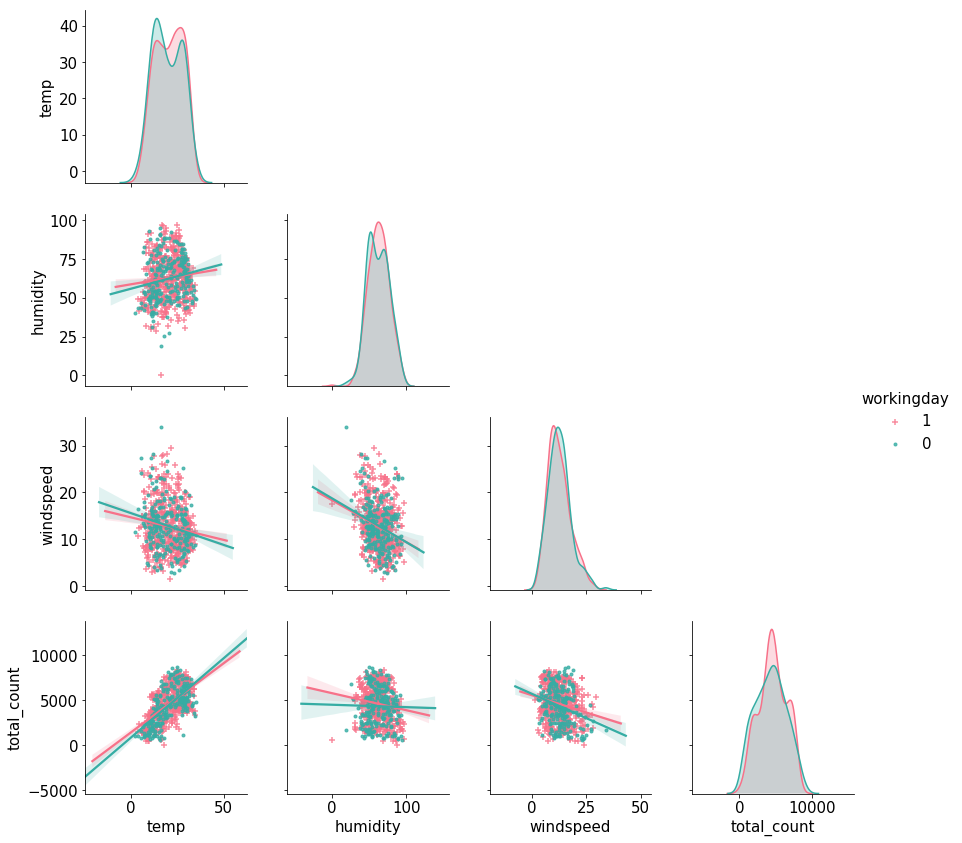

In [319]:
pair = sns.pairplot(data=df,
             height=3,
             vars=['temp','humidity','windspeed','total_count'], 
             hue='workingday',
             hue_order=[1,0],
             palette='husl', 
             kind='reg',
             markers=['+','.'])
for i, j in zip(*np.triu_indices_from(pair.axes, 1)):
    pair.axes[i, j].set_visible(False)
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> Concentrate on graphs below the diagonal graphs. Pink color indicates working days & Teak color shows non-working days.
<ul>
     <li>'total_count' with 'temp' shows minor difference in working and non-working days. </li>
     <li>'total_count' and 'humidity' shows negative steeper slope with working days as compared to non-working days.</li>
     <li>'total_count' with 'windspeed' show slight difference as the slope falls down where non-working days slope is steeper than working days.</li>     
</ul><br>
 
</div>

#### Observing 'total_count' w.r.t 'temp','humidity','windspeed' under 'weekday' ---> Mon/Tue/Wed/Thu/Fri/Sat/Sun category

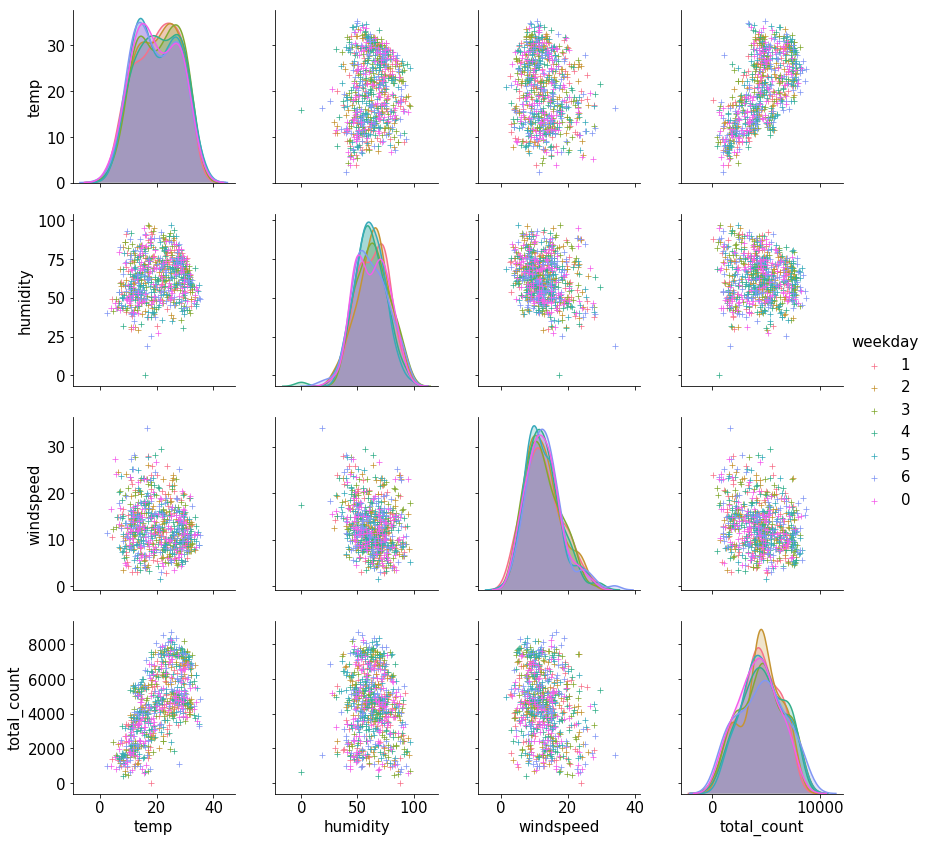

In [320]:
sns.pairplot(data=df, 
             height=3,
             vars=['temp','humidity','windspeed','total_count'], 
             hue='weekday',
             hue_order=[1,2,3,4,5,6,0],
             palette='husl', 
             kind='scatter',
             markers='+')
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> All the days are evenly distributed within the cluster.
 
</div>

## 5.3 Multivariate Analysis

#### Observing values of 'total_count' in 'workingday' rows and 'weekday' columns

In [321]:
column_order = [1,2,3,4,5,6,0]
result=pd.pivot_table(data=df, index='workingday', columns='weekday', values='total_count')
result = result.reindex_axis(column_order, axis = 1)
result

weekday,1,2,3,4,5,6,0
workingday,,,,,,,
0,3973.666667,1013.000000,7403.000000,1960.000000,3247.000000,4550.542857,4228.828571
1,4398.866667,4544.621359,4547.166667,4720.343137,4718.588235,NaN,NaN


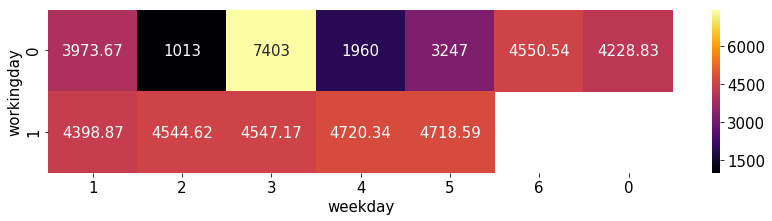

In [322]:
plt.figure(figsize=(14,3))
plt.rcParams['font.size'] = 15
sns.heatmap(result, annot=True, cmap='inferno', fmt='g')
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> Values within each sell is the 'total_count' in 'workingday' rows and 'weekday' columns
<ul>
    <li>'weekday': 1=Mon, 2=Tue, 3=Wed, 4=Thu, 5=Fri, 6=Sat, 0=Sun</li>
    <li>'workingday': 1=yes, 0=no</li>
</ul>
 
</div>

# <span style="color: red;"> PART II: Machine Learning </span>

In [323]:
import math
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from scipy.stats import kurtosis, skew

# 1. Data preparation

In [324]:
df.head()

,season,year,mnth,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
date,,,,,,,,,,,,,,
01-01-2018,spring,0,1,0,6,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.11,18.18,80.58,10.75,331,654,985
02-01-2018,spring,0,1,0,0,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.90,17.69,69.61,16.65,131,670,801
03-01-2018,spring,0,1,0,1,1,"Clear, Few clouds, Partly cloudy",8.05,9.47,43.73,16.64,120,1229,1349
04-01-2018,spring,0,1,0,2,1,"Clear, Few clouds, Partly cloudy",8.20,10.61,59.04,10.74,108,1454,1562
05-01-2018,spring,0,1,0,3,1,"Clear, Few clouds, Partly cloudy",9.31,11.46,43.70,12.52,82,1518,1600


<div class="alert alert-block alert-info">
<b>Note:</b> We have 'season' & 'weather' columns as object type with 4 and 3 levels of status respectively. These need to be converted into dummy variables for data preparation to build better linear model. 
</div>

## 1.1 Creating dummy variables

In [325]:
dummy_season = pd.get_dummies(df['season'], drop_first=True)
dummy_season.head()

,spring,summer,winter
date,,,
01-01-2018,1,0,0
02-01-2018,1,0,0
03-01-2018,1,0,0
04-01-2018,1,0,0
05-01-2018,1,0,0


<div class="alert alert-block alert-info">
<b>Note:</b> Dummy variables for 'season':
<ul>
    <li>000 --> fall</li>
    <li>100 --> spring</li>
    <li>010 --> summmer</li>
    <li>001 --> winter</li>
</ul>
 
</div>

In [326]:
dummy_weather = pd.get_dummies(df['weather'], drop_first=True)
dummy_weather.head()

,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
date,,
01-01-2018,0,1
02-01-2018,0,1
03-01-2018,0,0
04-01-2018,0,0
05-01-2018,0,0


<div class="alert alert-block alert-info">
<b>Note:</b> Dummy variables for 'weather':
<ul>
    <li>00 --> Clear, Few clouds, Partly cloudy</li>
    <li>10 --> Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds</li>
    <li>01 --> Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist</li>
</ul>
 
</div>

#### Encoding, Merging, Dropping, Renaming
- Encoding category levels
- Merging new dummy variable representative
- Dropping old/unnecessary columns
- Renaming some long column names

In [327]:
df = pd.concat([df, dummy_season, dummy_weather], axis = 1)
df.drop(['season','weather','atemp'], axis = 1, inplace=True)
df.rename(columns = {'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds':'rainy_weather', 
                     'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist':'misty_weather'}, 
                     inplace = True)

df1=df # for later use --> to build model using RFE method.
df.head()

,year,mnth,holiday,weekday,workingday,temp,humidity,windspeed,casual,registered,total_count,spring,summer,winter,rainy_weather,misty_weather
date,,,,,,,,,,,,,,,,
01-01-2018,0,1,0,6,0,14.11,80.58,10.75,331,654,985,1,0,0,0,1
02-01-2018,0,1,0,0,0,14.90,69.61,16.65,131,670,801,1,0,0,0,1
03-01-2018,0,1,0,1,1,8.05,43.73,16.64,120,1229,1349,1,0,0,0,0
04-01-2018,0,1,0,2,1,8.20,59.04,10.74,108,1454,1562,1,0,0,0,0
05-01-2018,0,1,0,3,1,9.31,43.70,12.52,82,1518,1600,1,0,0,0,0


In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 01-01-2018 to 31-12-2019
Data columns (total 16 columns):
year             730 non-null int64
mnth             730 non-null int64
holiday          730 non-null int64
weekday          730 non-null int64
workingday       730 non-null int64
temp             730 non-null float64
humidity         730 non-null float64
windspeed        730 non-null float64
casual           730 non-null int64
registered       730 non-null int64
total_count      730 non-null int64
spring           730 non-null uint8
summer           730 non-null uint8
winter           730 non-null uint8
rainy_weather    730 non-null uint8
misty_weather    730 non-null uint8
dtypes: float64(3), int64(8), uint8(5)
memory usage: 72.0+ KB


## 1.2 Splitting training and testing data

In [329]:
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [330]:
print('df_train =',df_train.shape)
print('df_test =',df_test.shape)

df_train = (510, 16)
df_test = (219, 16)


In [331]:
df_train.head(3)

,year,mnth,holiday,weekday,workingday,temp,humidity,windspeed,casual,registered,total_count,spring,summer,winter,rainy_weather,misty_weather
date,,,,,,,,,,,,,,,,
16-10-2019,1,10,0,2,1,19.20,55.83,12.21,922,6612,7534,0,0,1,0,0
31-07-2019,1,7,0,2,1,29.25,70.42,11.08,968,6248,7216,0,0,0,0,0
03-03-2019,1,3,0,6,0,16.98,62.12,10.79,956,3110,4066,1,0,0,0,1


In [332]:
df_test.head(3)

,year,mnth,holiday,weekday,workingday,temp,humidity,windspeed,casual,registered,total_count,spring,summer,winter,rainy_weather,misty_weather
date,,,,,,,,,,,,,,,,
04-07-2018,0,7,1,1,0,29.79,63.79,5.46,3065,2978,6043,0,0,0,0,1
20-06-2019,1,6,0,3,1,32.08,59.21,7.63,872,5339,6211,0,1,0,0,0
27-10-2018,0,10,0,4,1,19.27,81.29,13.25,240,2419,2659,0,0,1,0,1


<div class="alert alert-block alert-info">
<b>Note:</b> Here we can see that except for 'casual', 'registered' and 'total_count', all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. It may make our model less redundant.
</div>

## 1.3 Rescaling columns

In [333]:
scaler = MinMaxScaler()

In [334]:
# Rescaling all the numeric columns except yes/no type columns and dummy variables

cols = ['mnth', 'weekday', 'temp', 'humidity','windspeed', 'casual', 'registered', 'total_count']
df_train[cols] = scaler.fit_transform(df_train[cols])

In [335]:
df_train.head()

,year,mnth,holiday,weekday,workingday,temp,humidity,windspeed,casual,registered,total_count,spring,summer,winter,rainy_weather,misty_weather
date,,,,,,,,,,,,,,,,
16-10-2019,1,0.818182,0,0.333333,1,0.509875,0.575330,0.300930,0.280402,0.951776,0.864243,0,0,1,0,0
31-07-2019,1,0.545455,0,0.333333,1,0.815254,0.725680,0.264678,0.294422,0.899220,0.827658,0,0,0,0,0
03-03-2019,1,0.181818,0,1.000000,0,0.442419,0.640148,0.255374,0.290765,0.446145,0.465255,1,0,0,0,1
30-12-2019,1,1.000000,0,0.000000,0,0.245214,0.498042,0.663138,0.110332,0.203869,0.204096,1,0,0,0,0
28-04-2019,1,0.272727,0,1.000000,0,0.395624,0.504534,0.188643,0.340750,0.444701,0.482973,0,1,0,0,1


In [336]:
df_train.describe()

,year,mnth,holiday,weekday,workingday,temp,humidity,windspeed,casual,registered,total_count,spring,summer,winter,rainy_weather,misty_weather
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.507843,0.504456,0.025490,0.498366,0.676471,0.537300,0.650378,0.320866,0.254661,0.523944,0.513620,0.243137,0.245098,0.24902,0.029412,0.343137
std,0.500429,0.315338,0.157763,0.336182,0.468282,0.225801,0.145885,0.169770,0.206011,0.228175,0.224593,0.429398,0.430568,0.43287,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.181818,0.000000,0.166667,0.000000,0.339866,0.538644,0.199230,0.094179,0.353487,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,0.545455,0.000000,0.500000,1.000000,0.540565,0.653751,0.296760,0.212740,0.525123,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,0.818182,0.000000,0.833333,1.000000,0.735339,0.754818,0.414501,0.327415,0.696073,0.684710,0.000000,0.000000,0.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


<div class="alert alert-block alert-info">
<b>Note:</b> Rescaling by using MinMaxScaler() leads us with training dataset where min value in every column is 0.0 and max value in every column is 1.0 
</div>

#### Comparing correlation coefficients

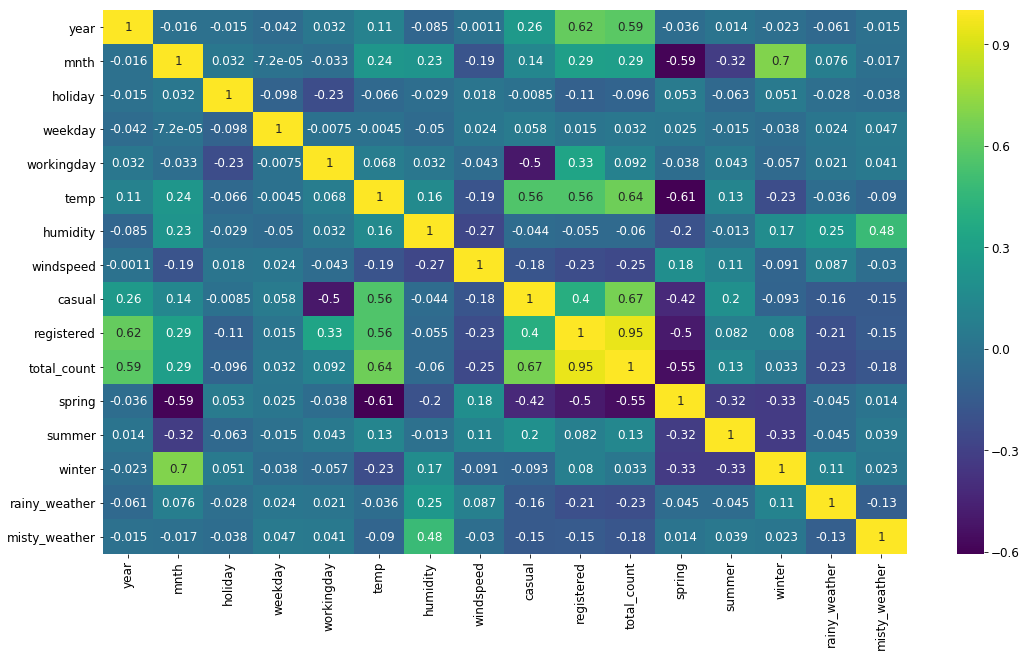

In [337]:
plt.rcParams['font.size'] = 12
plt.figure(figsize = (18, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="viridis")
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> Concentrate on green, yellow and deepest blue colors only. 
</div>

# 2. Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [338]:
Y_train = df_train.pop('total_count')
X_train = df_train

In [339]:
print('X_train =',X_train.shape)
print('Y_train =',Y_train.shape)

X_train = (510, 15)
Y_train = (510,)


<div class="alert alert-block alert-info">
<b>Note:</b> 510 rows makes 70% of df dataset as training dataset rest 220 rows make 30% of df as testing dataset.
</div>

#### Adding all the variables

In [340]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(Y_train, X_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.724e+31
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        01:19:01   Log-Likelihood:                 17488.
No. Observations:                 510   AIC:                        -3.494e+04
Df Residuals:                     494   BIC:                        -3.488e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.776e-16   1.36e-16     -2.034

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [341]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.set_index("Features", inplace = True)
vif

,VIF
Features,
const,95.67
registered,6.97
spring,5.84
temp,5.05
casual,4.00
mnth,3.93
winter,3.92
workingday,3.46
year,2.99


<div class="alert alert-block alert-info">
<b>Note:</b> Following conditions are possible:
<ol>
    <li>High p-value, High VIF --> least significant --> remove the column</li>
    <li>High p-value, Low VIF --> remove this and remodel</li>
    <li>Low p-value, High VIF --> remove this after 1st two steps and remodel</li>    
    <li>Low p-value, Low VIF --> most significant --> keep the column</li>
</ol>
We generally want a VIF that is less than 5 and p-value that is less than 0.05
</div>

<div class="alert alert-block alert-danger">
<b>Note:</b> Following parameters should be kept in mind:
<ul>
    <li>${{R}^2}$ = 1.0</li>
    <li>Highest p-value = 0.517 (weekday)</li>
    <li>VIF value = 1.06 (weekday)</li>
</ul>
</div>

#### Removing 'weekday' column

In [342]:
X_train_sm = X_train_sm.drop('weekday',axis=1)

In [343]:
X_train_sm = sm.add_constant(X_train_sm)  
lr = sm.OLS(Y_train, X_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.028e+30
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        01:19:01   Log-Likelihood:                 16924.
No. Observations:                 510   AIC:                        -3.382e+04
Df Residuals:                     495   BIC:                        -3.376e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -1.11e-16   4.07e-16     -0.273

In [344]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.set_index("Features", inplace = True)
vif

,VIF
Features,
const,93.55
registered,6.87
spring,5.83
temp,5.01
casual,3.97
mnth,3.92
winter,3.90
workingday,3.46
year,2.93


<div class="alert alert-block alert-danger">
<b>Note:</b> Following parameters should be kept in mind:
<ul>
    <li>${{R}^2}$ = 1.0</li>
    <li>Highest p-value = 0.429 (holiday)</li>
    <li>VIF value = 1.10 (holiday)</li>
</ul>
</div>

#### Removing 'holiday' column

In [345]:
X_train_sm = X_train_sm.drop('holiday',axis=1)

In [346]:
X_train_sm = sm.add_constant(X_train_sm)  
lr = sm.OLS(Y_train, X_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.034e+30
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        01:19:01   Log-Likelihood:                 16906.
No. Observations:                 510   AIC:                        -3.378e+04
Df Residuals:                     496   BIC:                        -3.372e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.163e-16    4.2e-16      0.990

In [347]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.set_index("Features", inplace = True)
vif

,VIF
Features,
const,92.83
registered,6.87
spring,5.83
temp,4.99
mnth,3.92
winter,3.89
casual,3.85
workingday,3.28
year,2.92


<div class="alert alert-block alert-danger">
<b>Note:</b> Following parameters should be kept in mind:
<ul>
    <li>${{R}^2}$ = 1.0</li>
    <li>Highest p-value = 0.980 (mnth)</li>
    <li>VIF value = 3.92 (mnth)</li>
</ul>
</div>

#### Removing 'mnth' column

In [348]:
X_train_sm = X_train_sm.drop('mnth',axis=1)

In [349]:
X_train_sm = sm.add_constant(X_train_sm)  
lr = sm.OLS(Y_train, X_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.062e+30
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        01:19:02   Log-Likelihood:                 16989.
No. Observations:                 510   AIC:                        -3.395e+04
Df Residuals:                     497   BIC:                        -3.390e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -7.772e-16   3.38e-16     -2.298

In [350]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.set_index("Features", inplace = True)
vif

,VIF
Features,
const,83.48
registered,6.84
temp,4.98
spring,4.71
casual,3.84
winter,3.32
workingday,3.25
year,2.90
summer,2.16


<div class="alert alert-block alert-danger">
<b>Note:</b> Following parameters should be kept in mind:
<ul>
    <li>${{R}^2}$ = 1.0</li>
    <li>Highest p-value = 0.937 (rainy_weather)</li>
    <li>VIF value = 1.45 (rainy_weather)</li>
</ul>
</div>

#### Removing 'rainy_weather' column

In [351]:
X_train_sm = X_train_sm.drop('rainy_weather',axis=1)

In [352]:
X_train_sm = sm.add_constant(X_train_sm)  
lr = sm.OLS(Y_train, X_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.796e+30
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        01:19:02   Log-Likelihood:                 17081.
No. Observations:                 510   AIC:                        -3.414e+04
Df Residuals:                     498   BIC:                        -3.409e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.388e-16   2.82e-16      0.492

In [353]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.set_index("Features", inplace = True)
vif

,VIF
Features,
const,83.23
registered,5.97
temp,4.95
spring,4.61
casual,3.84
winter,3.31
workingday,3.17
year,2.64
summer,2.16


<div class="alert alert-block alert-danger">
<b>Note:</b> Following parameters should be kept in mind:
<ul>
    <li>${{R}^2}$ = 1.0</li>
    <li>Highest p-value = 0.767 (temp)</li>
    <li>VIF value = 4.95 (temp)</li>
</ul>
</div>

#### Removing 'temp' column

In [354]:
X_train_sm = X_train_sm.drop('temp',axis=1)

In [355]:
X_train_sm = sm.add_constant(X_train_sm)  
lr = sm.OLS(Y_train, X_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.127e+29
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        01:19:02   Log-Likelihood:                 16431.
No. Observations:                 510   AIC:                        -3.284e+04
Df Residuals:                     499   BIC:                        -3.279e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.331e-16   9.64e-16      0.346

In [356]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.set_index("Features", inplace = True)
vif

,VIF
Features,
const,76.17
registered,5.35
casual,3.45
workingday,3.16
spring,2.90
year,2.45
winter,1.74
summer,1.59
humidity,1.55


<div class="alert alert-block alert-danger">
<b>Note:</b> Following parameters should be kept in mind:
<ul>
    <li>${{R}^2}$ = 1.0</li>
    <li>Highest p-value = 0.616 (year)</li>
    <li>VIF value = 2.45 (year)</li>
</ul>
</div>

#### Removing 'year' column

In [357]:
X_train_sm = X_train_sm.drop('year',axis=1)

In [358]:
X_train_sm = sm.add_constant(X_train_sm)  
lr = sm.OLS(Y_train, X_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.475e+30
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        01:19:02   Log-Likelihood:                 16860.
No. Observations:                 510   AIC:                        -3.370e+04
Df Residuals:                     500   BIC:                        -3.366e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.943e-16   3.97e-16     -0.489

In [359]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.set_index("Features", inplace = True)
vif

,VIF
Features,
const,69.79
casual,3.40
workingday,2.81
registered,2.57
spring,2.38
winter,1.73
summer,1.56
humidity,1.55
misty_weather,1.36


<div class="alert alert-block alert-danger">
<b>Note:</b> Following parameters should be kept in mind:
<ul>
    <li>${{R}^2}$ = 1.0</li>
    <li>Highest p-value = 0.715 (spring)</li>
    <li>VIF value = 2.38 (spring)</li>
</ul>
</div>

#### Removing 'spring' column

In [360]:
X_train_sm = X_train_sm.drop('spring',axis=1)

In [361]:
X_train_sm = sm.add_constant(X_train_sm)  
lr = sm.OLS(Y_train, X_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.664e+31
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        01:19:02   Log-Likelihood:                 17315.
No. Observations:                 510   AIC:                        -3.461e+04
Df Residuals:                     501   BIC:                        -3.457e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.665e-16   1.36e-16     -1.226

In [362]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.set_index("Features", inplace = True)
vif

,VIF
Features,
const,48.79
casual,3.08
workingday,2.76
registered,2.43
humidity,1.48
misty_weather,1.36
winter,1.26
summer,1.22
windspeed,1.21


<div class="alert alert-block alert-danger">
<b>Note:</b> Following parameters should be kept in mind:
<ul>
    <li>${{R}^2}$ = 1.0</li>
    <li>Highest p-value = none</li>
    <li>Highest VIF value = none</li>
</ul>
This is the last stage of preparing data. The leftover columns are signicant as both p-value and VIF value are under range.
</div>

# 3. Residual Analysis

In [363]:
Y_train_pred = lr.predict(X_train_sm)

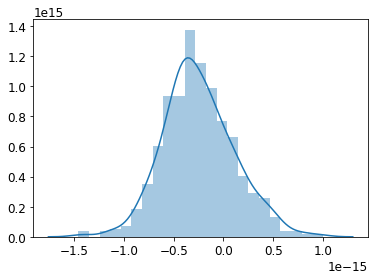

In [364]:
res = Y_train - Y_train_pred
sns.distplot(res)

<div class="alert alert-block alert-info">
<b>Note:</b> The distribution plot should be such that it is centered around 0.
</div>

## 3.1 Rescaling Test Dataset

In [365]:
cols = ['mnth', 'weekday', 'temp', 'humidity','windspeed', 'casual', 'registered', 'total_count']
df_test[cols] = scaler.transform(df_test[cols])

In [366]:
df_test.describe()

,year,mnth,holiday,weekday,workingday,temp,humidity,windspeed,casual,registered,total_count,spring,summer,winter,rainy_weather,misty_weather
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.497717,0.036530,0.503044,0.698630,0.558972,0.638521,0.313450,0.266372,0.527146,0.520592,0.255708,0.264840,0.232877,0.027397,0.319635
std,0.500722,0.311080,0.188034,0.331402,0.459904,0.233671,0.148978,0.159911,0.217246,0.217921,0.218435,0.437258,0.442259,0.423633,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.046794,0.261954,-0.042669,0.002133,0.059486,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.272727,0.000000,0.166667,0.000000,0.354603,0.527257,0.198588,0.101951,0.359154,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.454545,0.000000,0.500000,1.000000,0.558797,0.627782,0.299647,0.223712,0.526567,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.727273,0.000000,0.833333,1.000000,0.759192,0.743972,0.403272,0.362085,0.664742,0.672745,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.984503,1.002164,0.807507,1.038708,0.985273,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000


<div class="alert alert-block alert-info">
<b>Note:</b> Recall that max values in each column of df_train dataset was 1.0 but here this is not the case in df_test dataset because this time we did not fit the scaler. we only used transform() function.
</div>

## 3.2 Preparing Test Dataset

In [367]:
Y_test = df_test.pop('total_count')
X_test = df_test

In [368]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,year,mnth,holiday,weekday,workingday,temp,humidity,windspeed,casual,registered,spring,summer,winter,rainy_weather,misty_weather
date,,,,,,,,,,,,,,,,
04-07-2018,1.0,0,0.545455,1,0.166667,0,0.831662,0.657358,0.084376,0.933557,0.427086,0,0,0,0,1
20-06-2019,1.0,1,0.454545,0,0.500000,1,0.901246,0.610161,0.153994,0.265163,0.767976,0,1,0,0,0
27-10-2018,1.0,0,0.818182,0,0.666667,1,0.512002,0.837696,0.334296,0.072539,0.346376,0,0,1,0,1
10-08-2018,1.0,0,0.636364,0,0.500000,1,0.881495,0.437139,0.339750,0.268820,0.559630,0,0,0,0,0
02-06-2018,1.0,0,0.454545,0,0.666667,1,0.817381,0.314303,0.537376,0.223712,0.608143,0,1,0,0,0


#### Drop the same feature variables which you dropped using p-value, VIF to keep only significant features.

In [369]:
X_test_sm = X_test_sm.drop(['spring', 'temp', 'mnth', 'year', 'rainy_weather', 'holiday', 'weekday'], axis = 1)

In [370]:
X_test_sm.head()

,const,workingday,humidity,windspeed,casual,registered,summer,winter,misty_weather
date,,,,,,,,,
04-07-2018,1.0,0,0.657358,0.084376,0.933557,0.427086,0,0,1
20-06-2019,1.0,1,0.610161,0.153994,0.265163,0.767976,1,0,0
27-10-2018,1.0,1,0.837696,0.334296,0.072539,0.346376,0,1,1
10-08-2018,1.0,1,0.437139,0.339750,0.268820,0.559630,0,0,0
02-06-2018,1.0,1,0.314303,0.537376,0.223712,0.608143,1,0,0


## 3.3 Prediction on test set

In [371]:
Y_pred = lr.predict(X_test_sm)

# 4. Final Model Evaluation

In [372]:
r2_score(y_true=Y_test,y_pred=Y_pred)

1.0

<div class="alert alert-block alert-info">
<b>Note:</b> ${{R}^2}$ score of the final model is 100%
</div>

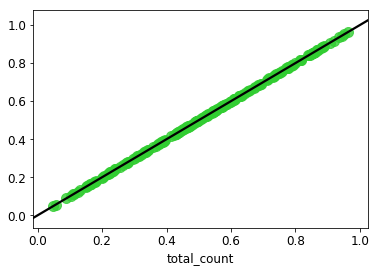

In [373]:
plot = sns.regplot(Y_test, Y_pred, color='limegreen', scatter_kws={'s':100, 'marker':'o'})
regline = plot.get_lines()[0]
regline.set_color('black')
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> <b>Y_test vs Y_pred</b><br>
</div>

# Building model using RFE method
#### (Method - 2)

In [374]:
#We are taking the same prepared dataset df1=df
df1.head()

,year,mnth,holiday,weekday,workingday,temp,humidity,windspeed,casual,registered,total_count,spring,summer,winter,rainy_weather,misty_weather
date,,,,,,,,,,,,,,,,
01-01-2018,0,1,0,6,0,14.11,80.58,10.75,331,654,985,1,0,0,0,1
02-01-2018,0,1,0,0,0,14.90,69.61,16.65,131,670,801,1,0,0,0,1
03-01-2018,0,1,0,1,1,8.05,43.73,16.64,120,1229,1349,1,0,0,0,0
04-01-2018,0,1,0,2,1,8.20,59.04,10.74,108,1454,1562,1,0,0,0,0
05-01-2018,0,1,0,3,1,9.31,43.70,12.52,82,1518,1600,1,0,0,0,0


## Spliting Train - Test data

In [375]:
df1_train, df1_test = train_test_split(df1, train_size = 0.7, test_size = 0.3, random_state = 100)

## Rescaling Columns

In [376]:
scaler = MinMaxScaler()

In [377]:
cols = ['mnth', 'weekday', 'temp', 'humidity','windspeed', 'casual', 'registered', 'total_count']
df1_train[cols] = scaler.fit_transform(df1_train[cols])

In [378]:
df1_train.head()

,year,mnth,holiday,weekday,workingday,temp,humidity,windspeed,casual,registered,total_count,spring,summer,winter,rainy_weather,misty_weather
date,,,,,,,,,,,,,,,,
16-10-2019,1,0.818182,0,0.333333,1,0.509875,0.575330,0.300930,0.280402,0.951776,0.864243,0,0,1,0,0
31-07-2019,1,0.545455,0,0.333333,1,0.815254,0.725680,0.264678,0.294422,0.899220,0.827658,0,0,0,0,0
03-03-2019,1,0.181818,0,1.000000,0,0.442419,0.640148,0.255374,0.290765,0.446145,0.465255,1,0,0,0,1
30-12-2019,1,1.000000,0,0.000000,0,0.245214,0.498042,0.663138,0.110332,0.203869,0.204096,1,0,0,0,0
28-04-2019,1,0.272727,0,1.000000,0,0.395624,0.504534,0.188643,0.340750,0.444701,0.482973,0,1,0,0,1


In [379]:
Y_train = df1_train.pop('total_count') # Target variable
X_train = df1_train # Feature variables

## Preparing model

In [380]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

rfe = RFE(lr, 10)            
rfe = rfe.fit(X_train, Y_train)

In [381]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', False, 2),
 ('mnth', True, 1),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('humidity', False, 6),
 ('windspeed', True, 1),
 ('casual', True, 1),
 ('registered', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', False, 3),
 ('rainy_weather', True, 1),
 ('misty_weather', False, 4)]

## Columns that will retain after using RFE method

In [382]:
col = X_train.columns[rfe.support_]
col

Index(['mnth', 'holiday', 'weekday', 'temp', 'windspeed', 'casual',
       'registered', 'spring', 'summer', 'rainy_weather'],
      dtype='object')

## Columns that will be removed after using RFE method

In [383]:
X_train.columns[~rfe.support_]

Index(['year', 'workingday', 'humidity', 'winter', 'misty_weather'], dtype='object')

#### New set of significant columns

In [384]:
X_train_rfe = X_train[col]

In [385]:
X_train_rfe = sm.add_constant(X_train_rfe)
lr = sm.OLS(Y_train,X_train_rfe).fit() 
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.040e+30
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        01:19:07   Log-Likelihood:                 16666.
No. Observations:                 510   AIC:                        -3.331e+04
Df Residuals:                     499   BIC:                        -3.326e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.596e-16   5.13e-16      0.311

<div class="alert alert-block alert-danger">
<b>Note:</b> Following parameters should be kept in mind:
<ul>
    <li>${{R}^2}$ = 1.0</li>
    <li>Highest p-value = 0.963 (holiday)</li>
</ul>
</div>

#### Manually removing 'holiday' feature

In [386]:
X_train_rfe = X_train_rfe.drop(["holiday"], axis = 1)
lr = sm.OLS(Y_train,X_train_rfe).fit() 
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.674e+30
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        01:19:07   Log-Likelihood:                 17113.
No. Observations:                 510   AIC:                        -3.421e+04
Df Residuals:                     500   BIC:                        -3.416e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.788e-16   2.13e-16      2.247

<div class="alert alert-block alert-danger">
<b>Note:</b> Following parameters should be kept in mind:
<ul>
    <li>${{R}^2}$ = 1.0</li>
    <li>Highest p-value = 0.812 (spring)</li>
</ul>
</div>

#### Manually removing 'spring' feature

In [387]:
X_train_rfe = X_train_rfe.drop(["spring"], axis = 1)
lr = sm.OLS(Y_train,X_train_rfe).fit() 
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.672e+30
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        01:19:07   Log-Likelihood:                 17082.
No. Observations:                 510   AIC:                        -3.415e+04
Df Residuals:                     501   BIC:                        -3.411e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.292e-16   1.32e-16      0.982

<div class="alert alert-block alert-danger">
<b>Note:</b> Following parameters should be kept in mind:
<ul>
    <li>${{R}^2}$ = 1.0</li>
    <li>Highest p-value = 0.971 (windspeed)</li>
</ul>
</div>

#### Manually removing 'windspeed' feature

In [388]:
X_train_rfe = X_train_rfe.drop(["windspeed"], axis = 1)
lr = sm.OLS(Y_train,X_train_rfe).fit() 
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.418e+31
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        01:19:07   Log-Likelihood:                 17694.
No. Observations:                 510   AIC:                        -3.537e+04
Df Residuals:                     502   BIC:                        -3.534e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.955e-16   3.15e-17    -12.539

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [389]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.set_index("Features", inplace = True)
vif

,VIF
Features,
const,11.65
temp,1.86
registered,1.64
casual,1.55
mnth,1.32
summer,1.22
rainy_weather,1.10
weekday,1.01


<div class="alert alert-block alert-danger">
<b>Note:</b> Following parameters should be kept in mind:
<ul>
    <li>${{R}^2}$ = 1.0</li>
    <li>Highest p-value = none</li>
    <li>Highest VIF value = none</li>
</ul>
This is the last stage of preparing data. The leftover columns are signicant as both p-value and VIF value are under range.
</div>

## Residual Analysis

In [390]:
Y_train_pred = lr.predict(X_train_rfe)

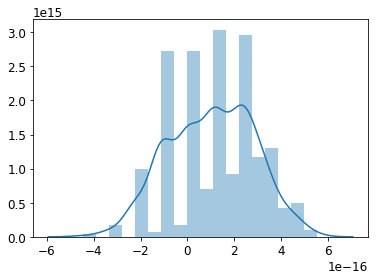

In [391]:
res = Y_train - Y_train_pred
sns.distplot(res)

## Rescaling Test Data set

In [392]:
cols = ['mnth', 'weekday', 'temp', 'humidity','windspeed', 'casual', 'registered', 'total_count']
df1_test[cols] = scaler.transform(df1_test[cols])

In [393]:
df1_test.describe()

,year,mnth,holiday,weekday,workingday,temp,humidity,windspeed,casual,registered,total_count,spring,summer,winter,rainy_weather,misty_weather
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.497717,0.036530,0.503044,0.698630,0.558972,0.638521,0.313450,0.266372,0.527146,0.520592,0.255708,0.264840,0.232877,0.027397,0.319635
std,0.500722,0.311080,0.188034,0.331402,0.459904,0.233671,0.148978,0.159911,0.217246,0.217921,0.218435,0.437258,0.442259,0.423633,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.046794,0.261954,-0.042669,0.002133,0.059486,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.272727,0.000000,0.166667,0.000000,0.354603,0.527257,0.198588,0.101951,0.359154,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.454545,0.000000,0.500000,1.000000,0.558797,0.627782,0.299647,0.223712,0.526567,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.727273,0.000000,0.833333,1.000000,0.759192,0.743972,0.403272,0.362085,0.664742,0.672745,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.984503,1.002164,0.807507,1.038708,0.985273,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000


In [394]:
Y_test = df1_test.pop('total_count')
X_test = df1_test

In [395]:
X_test_rfe = sm.add_constant(X_test)
X_test_rfe.head()

,const,year,mnth,holiday,weekday,workingday,temp,humidity,windspeed,casual,registered,spring,summer,winter,rainy_weather,misty_weather
date,,,,,,,,,,,,,,,,
04-07-2018,1.0,0,0.545455,1,0.166667,0,0.831662,0.657358,0.084376,0.933557,0.427086,0,0,0,0,1
20-06-2019,1.0,1,0.454545,0,0.500000,1,0.901246,0.610161,0.153994,0.265163,0.767976,0,1,0,0,0
27-10-2018,1.0,0,0.818182,0,0.666667,1,0.512002,0.837696,0.334296,0.072539,0.346376,0,0,1,0,1
10-08-2018,1.0,0,0.636364,0,0.500000,1,0.881495,0.437139,0.339750,0.268820,0.559630,0,0,0,0,0
02-06-2018,1.0,0,0.454545,0,0.666667,1,0.817381,0.314303,0.537376,0.223712,0.608143,0,1,0,0,0


#### Drop the same feature variables which you dropped using RFE, p-value, VIF to keep only significant features.

In [396]:
X_test_rfe = X_test_rfe.drop(['year', 'workingday', 'humidity', 'winter', 'misty_weather', 'holiday', 'spring', 'windspeed'], axis = 1)

In [397]:
X_test_rfe.head()

,const,mnth,weekday,temp,casual,registered,summer,rainy_weather
date,,,,,,,,
04-07-2018,1.0,0.545455,0.166667,0.831662,0.933557,0.427086,0,0
20-06-2019,1.0,0.454545,0.500000,0.901246,0.265163,0.767976,1,0
27-10-2018,1.0,0.818182,0.666667,0.512002,0.072539,0.346376,0,0
10-08-2018,1.0,0.636364,0.500000,0.881495,0.268820,0.559630,0,0
02-06-2018,1.0,0.454545,0.666667,0.817381,0.223712,0.608143,1,0


## Prediction on Test Dataset

In [398]:
Y_pred = lr.predict(X_test_rfe)

# Final Model Evaluation

In [399]:
r2_score(y_true=Y_test,y_pred=Y_pred)

1.0

<div class="alert alert-block alert-info">
<b>Note:</b> ${{R}^2}$ score of the final model is 100%
</div>

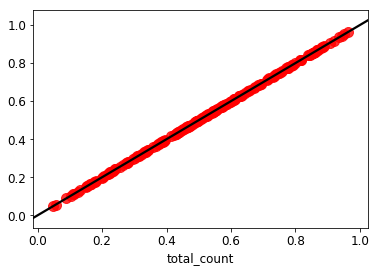

In [400]:
plot = sns.regplot(Y_test, Y_pred, color='red', scatter_kws={'s':100, 'marker':'o'})
regline = plot.get_lines()[0]
regline.set_color('black')
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> Y_test vs Y_pred
</div>